In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [3]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
      kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [4]:

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [5]:
series = pd.read_csv('city_day.csv')
series_delhi = series.loc[series['City'] == 'Delhi']
ts_delhi = series_delhi[['Date','AQI']]
#converting 'Date' column to type 'datetime' so that indexing can happen later
ts_delhi['Date'] = pd.to_datetime(ts_delhi['Date'])

display(ts_delhi)

,Date,AQI
10229,2015-01-01,472.0
10230,2015-01-02,454.0
10231,2015-01-03,143.0
10232,2015-01-04,319.0
10233,2015-01-05,325.0
...,...,...
12233,2020-06-27,112.0
12234,2020-06-28,196.0
12235,2020-06-29,233.0
12236,2020-06-30,114.0


In [6]:
ts_delhi['Date'].min(), ts_delhi['Date'].max()

(Timestamp('2015-01-01 00:00:00'), Timestamp('2020-07-01 00:00:00'))

In [7]:
ts_delhi.isnull().sum()
ts_delhi = ts_delhi.dropna()
ts_delhi.isnull().sum()

Date    0
AQI     0
dtype: int64

In [8]:
ts_delhi = ts_delhi.set_index('Date')
display(ts_delhi)

,AQI
Date,
2015-01-01,472.0
2015-01-02,454.0
2015-01-03,143.0
2015-01-04,319.0
2015-01-05,325.0
...,...
2020-06-27,112.0
2020-06-28,196.0
2020-06-29,233.0


In [12]:
ts_month_avg = ts_delhi['AQI'].resample('MS').mean()
display(ts_month_avg)

Date
2015-01-01    342.290323
2015-02-01    327.928571
2015-03-01    256.064516
2015-04-01    305.266667
2015-05-01    348.580645
                 ...    
2020-03-01    135.838710
2020-04-01    113.000000
2020-05-01    148.645161
2020-06-01    125.733333
2020-07-01    101.000000
Freq: MS, Name: AQI, Length: 67, dtype: float64

In [72]:
display(ts_month_avg.tail())

Date
2020-03-01    135.838710
2020-04-01    113.000000
2020-05-01    148.645161
2020-06-01    125.733333
2020-07-01    101.000000
Freq: MS, Name: AQI, dtype: float64

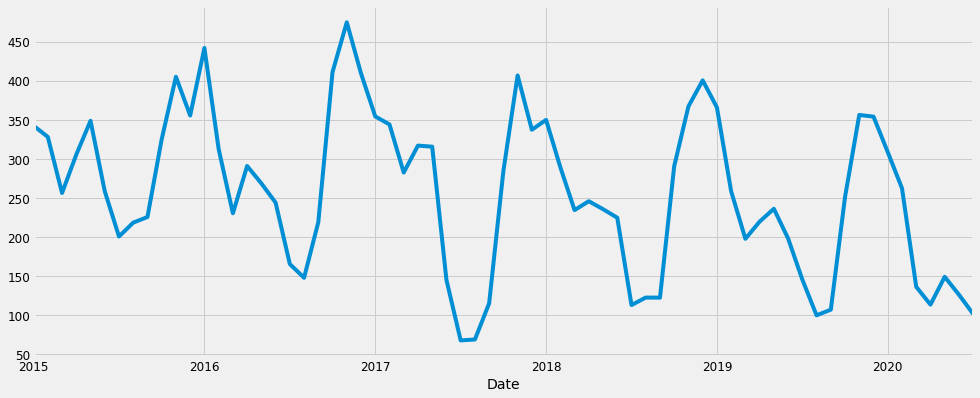

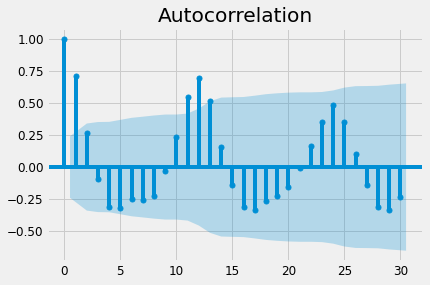

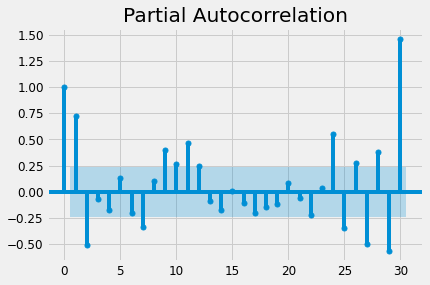

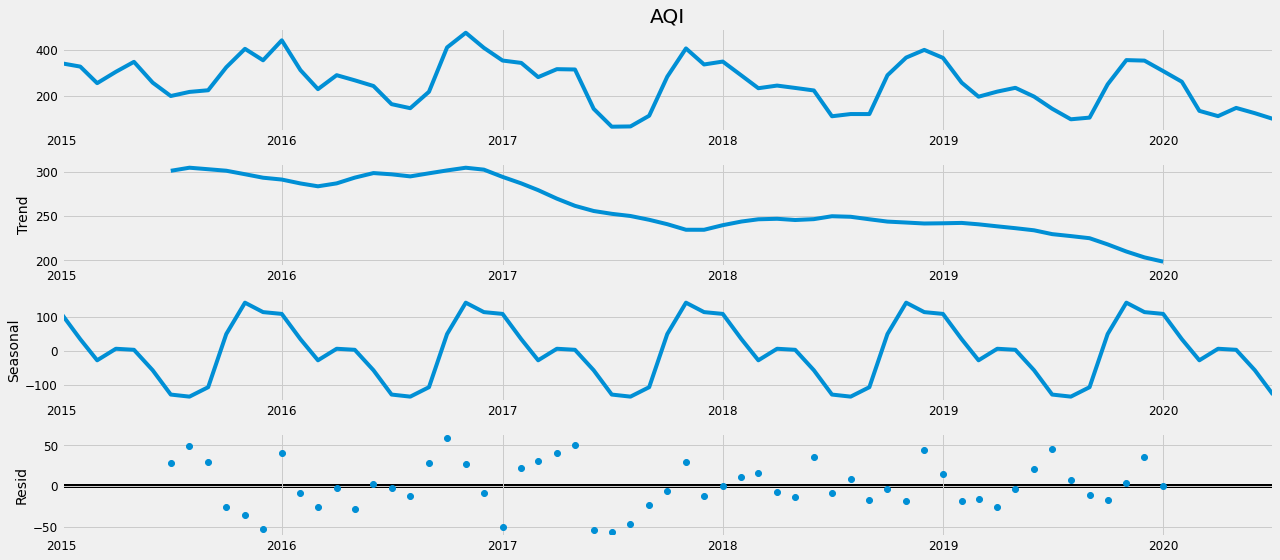

In [14]:
ts_month_avg.plot(figsize=(15, 6))
plt.show()
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(ts_month_avg, lags=30)
matplotlib.pyplot.show()
plot_pacf(ts_month_avg, lags=30)
matplotlib.pyplot.show()

from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(ts_month_avg, model='additive')
fig = decomposition.plot()
plt.show()

In [15]:
#apply adf test on the series
print(adf_test(ts_month_avg))
print(kpss_test(ts_month_avg))

Results of Dickey-Fuller Test:
Test Statistic                  0.229024
p-value                         0.973843
#Lags Used                     11.000000
Number of Observations Used    55.000000
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
Critical Value (10%)           -2.595670
dtype: float64
None
Results of KPSS Test:
Test Statistic            0.650669
p-value                   0.018030
Lags Used                11.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
None


<AxesSubplot:xlabel='Date'>

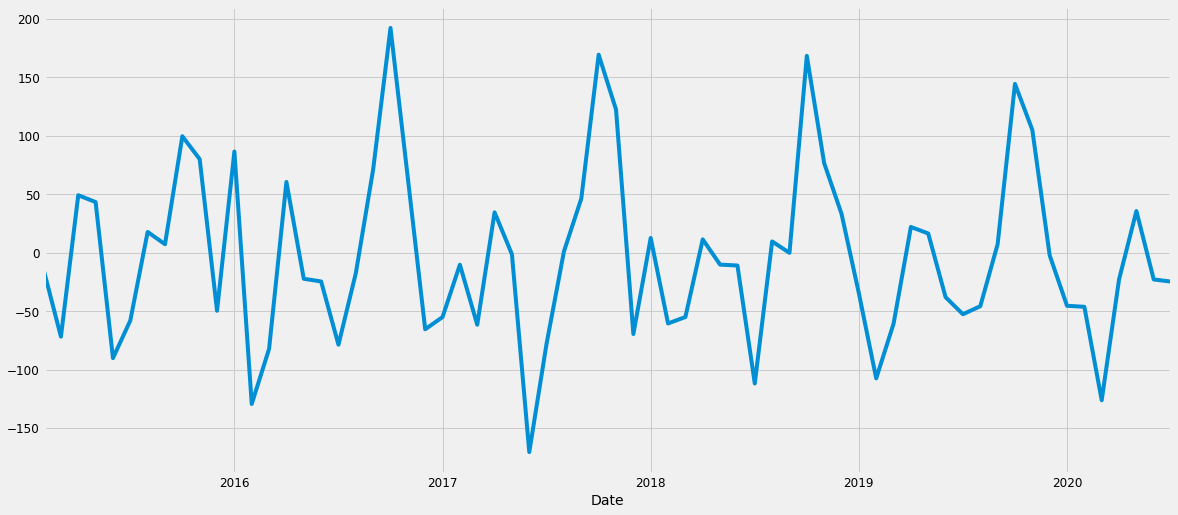

In [16]:
ts_t_adj = ts_month_avg - ts_month_avg.shift(1)
ts_t_adj = ts_t_adj.dropna()
ts_t_adj.plot()

<AxesSubplot:xlabel='Date'>

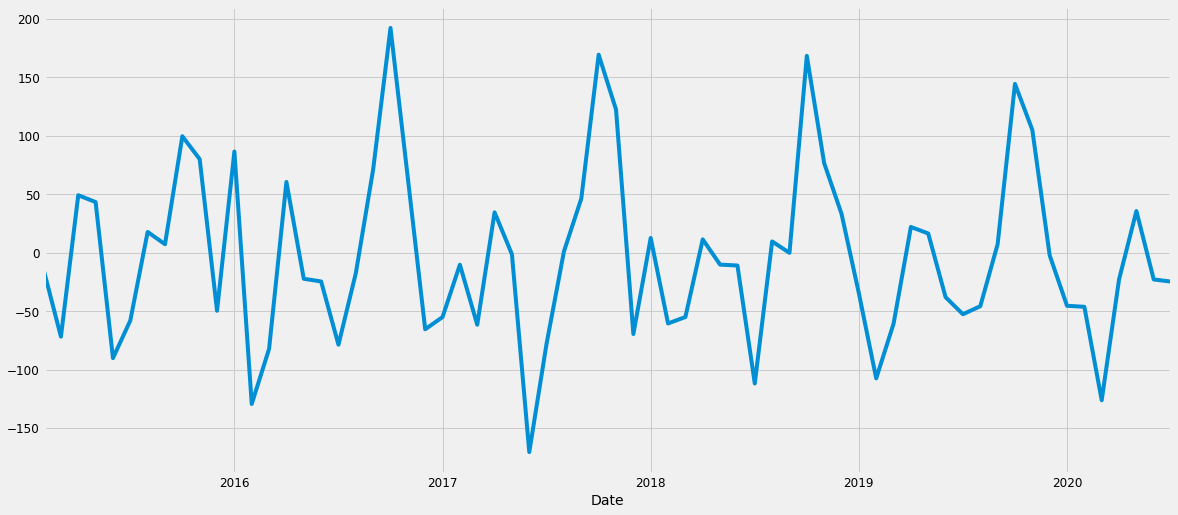

In [20]:
ts_t_adj = ts_month_avg.diff().dropna()
ts_t_adj.plot()

In [21]:
#apply adf test on the series
print(adf_test(ts_t_adj))

Results of Dickey-Fuller Test:
Test Statistic                -6.795995e+00
p-value                        2.300252e-09
#Lags Used                     1.000000e+01
Number of Observations Used    5.500000e+01
Critical Value (1%)           -3.555273e+00
Critical Value (5%)           -2.915731e+00
Critical Value (10%)          -2.595670e+00
dtype: float64
None


<AxesSubplot:xlabel='Date'>

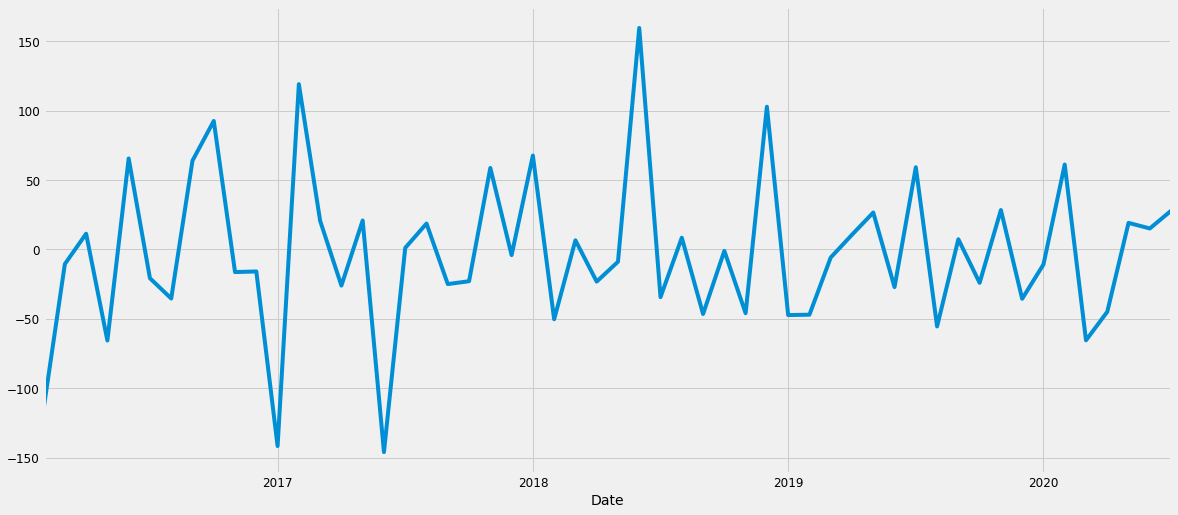

In [22]:
ts_s_adj = ts_t_adj - ts_t_adj.shift(12)
ts_s_adj = ts_s_adj.dropna()
ts_s_adj.plot()

<AxesSubplot:xlabel='Date'>

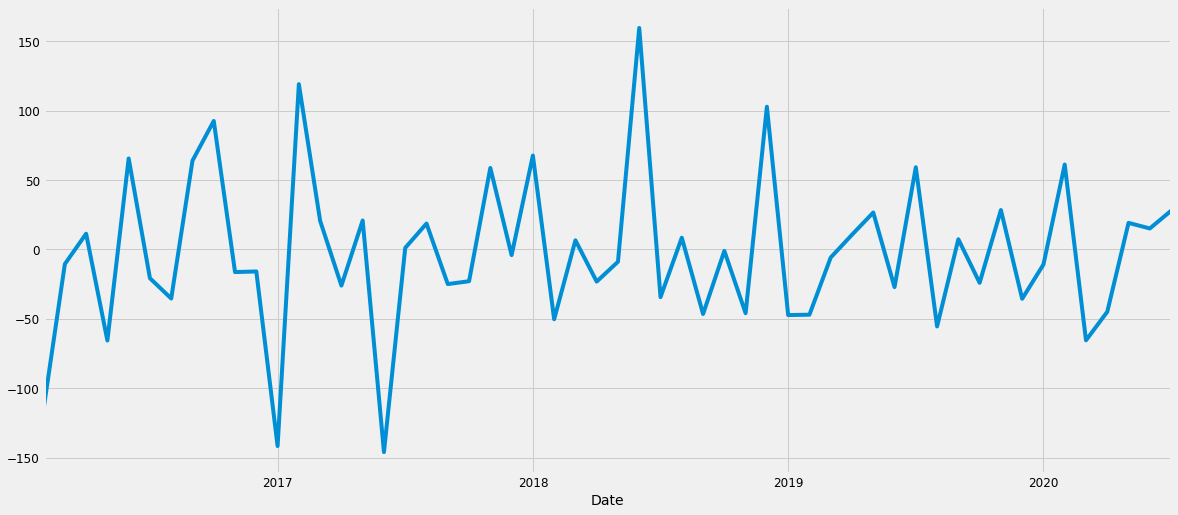

In [24]:
ts_s_adj = ts_t_adj.diff(12).dropna()
ts_s_adj.plot()

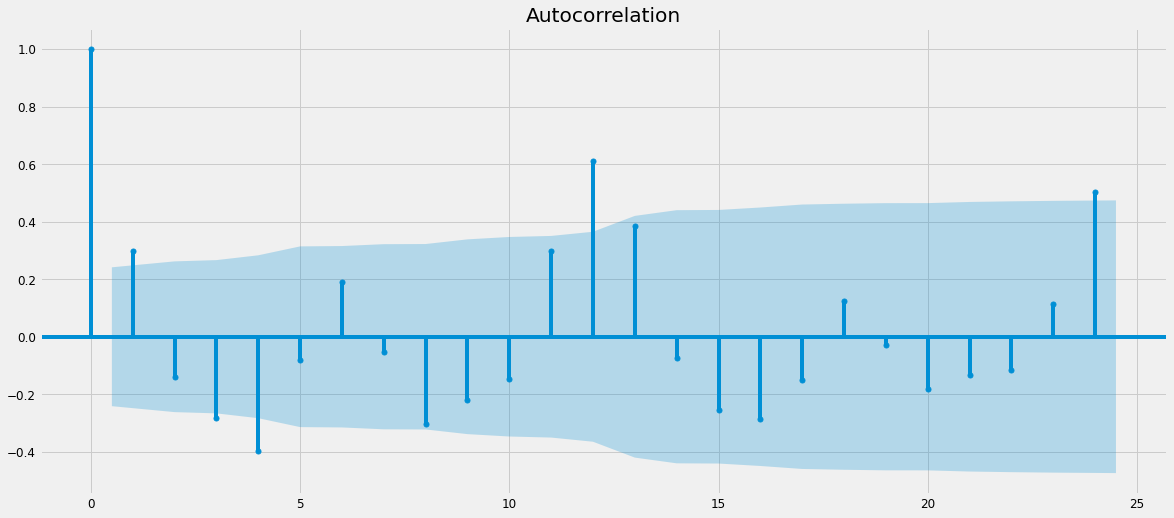

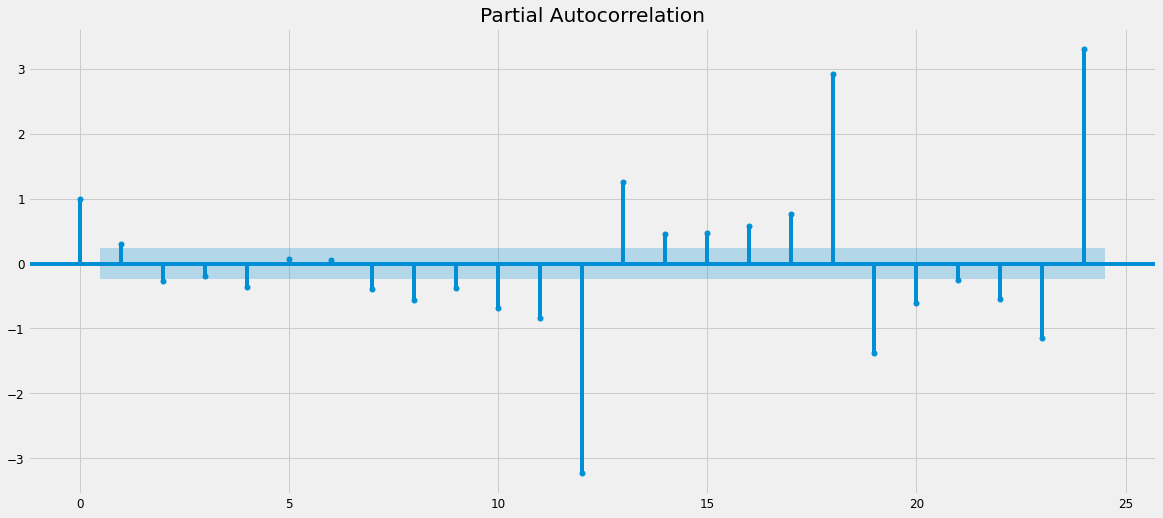

In [25]:
# Plotting the ACF and PACF Plot of the Trend and Seasonally adjusted Time Series data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(ts_t_adj, lags=24)
matplotlib.pyplot.show()
plot_pacf(ts_t_adj, lags = 24)
matplotlib.pyplot.show()

In [26]:
p = range(0, 3)
d = range(1, 2)
q = range(0, 4)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
seasonal_pdq

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 1, 1, 12)
SARIMAX: (0, 1, 1) x (0, 1, 2, 12)
SARIMAX: (0, 1, 2) x (0, 1, 3, 12)


[(0, 1, 0, 12),
 (0, 1, 1, 12),
 (0, 1, 2, 12),
 (0, 1, 3, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 1, 3, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 1, 3, 12)]

In [30]:
list(itertools.product(p, d, q))

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3)]

In [27]:

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts_s_adj,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            )
            results = mod.fit(method = 'powell')
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

A(0, 1, 3)x(1, 1, 0, 12)12 - AIC:484.115359979835
Optimization terminated successfully.
         Current function value: 4.330005
         Iterations: 6
         Function evaluations: 496
ARIMA(0, 1, 3)x(1, 1, 1, 12)12 - AIC:479.64050960586
Optimization terminated successfully.
         Current function value: 4.326154
         Iterations: 7
         Function evaluations: 634
ARIMA(0, 1, 3)x(1, 1, 2, 12)12 - AIC:481.22466275322375
Optimization terminated successfully.
         Current function value: 4.324506
         Iterations: 6
         Function evaluations: 627
ARIMA(0, 1, 3)x(1, 1, 3, 12)12 - AIC:483.04663232129843
Optimization terminated successfully.
         Current function value: 4.316638
         Iterations: 5
         Function evaluations: 439
ARIMA(0, 1, 3)x(2, 1, 0, 12)12 - AIC:478.19691009036524
Optimization terminated successfully.
         Current function value: 4.316090
         Iterations: 5
         Function evaluations: 496
ARIMA(0, 1, 3)x(2, 1, 1, 12)12 - AIC:48

In [40]:
pdq[1]

(0, 1, 1)

In [55]:
df = pd.DataFrame()

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts_s_adj,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            )
            results = mod.fit(method = 'powell')
            #print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            print('ARIMA{}x{}12'.format(param, param_seasonal))

            data = {'p': param, 'ps': param_seasonal, 'AIC':results.aic }
            df = df.append(data, ignore_index=True)

        except:
            continue


MA(0, 1, 2)x(0, 1, 1, 12)12
Optimization terminated successfully.
         Current function value: 4.343094
         Iterations: 6
         Function evaluations: 440
ARIMA(0, 1, 2)x(0, 1, 2, 12)12
Optimization terminated successfully.
         Current function value: 4.344172
         Iterations: 4
         Function evaluations: 359
ARIMA(0, 1, 2)x(0, 1, 3, 12)12
Optimization terminated successfully.
         Current function value: 4.408721
         Iterations: 4
         Function evaluations: 191
ARIMA(0, 1, 2)x(1, 1, 0, 12)12
Optimization terminated successfully.
         Current function value: 4.352287
         Iterations: 7
         Function evaluations: 423
ARIMA(0, 1, 2)x(1, 1, 1, 12)12
Optimization terminated successfully.
         Current function value: 4.346295
         Iterations: 7
         Function evaluations: 564
ARIMA(0, 1, 2)x(1, 1, 2, 12)12
Optimization terminated successfully.
         Current function value: 4.342859
         Iterations: 6
         Function evalua

In [56]:
df.sort_values(by="AIC",ascending=False)

,AIC,p,ps
0,537.732834,"(0, 1, 0)","(0, 1, 0, 12)"
48,519.385087,"(1, 1, 0)","(0, 1, 0, 12)"
1,515.129386,"(0, 1, 0)","(0, 1, 1, 12)"
96,514.676374,"(2, 1, 0)","(0, 1, 0, 12)"
4,512.642411,"(0, 1, 0)","(1, 1, 0, 12)"
...,...,...,...
68,478.030905,"(1, 1, 1)","(2, 1, 0, 12)"
32,478.006643,"(0, 1, 2)","(2, 1, 0, 12)"
14,477.952978,"(0, 1, 1)","(0, 1, 2, 12)"
21,477.823472,"(0, 1, 1)","(2, 1, 1, 12)"


In [78]:
#ARIMA(0, 1, 1)x(2, 1, 0, 12)
mod = sm.tsa.statespace.SARIMAX(ts_s_adj,
                                order=(0, 1, 0),
                                seasonal_order=(0, 1, 0, 12))
results = mod.fit(method = 'powell')
print(results.summary().tables[1])

Optimization terminated successfully.
         Current function value: 4.960489
         Iterations: 2
         Function evaluations: 33
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.769e+04   6828.174      4.055      0.000    1.43e+04    4.11e+04


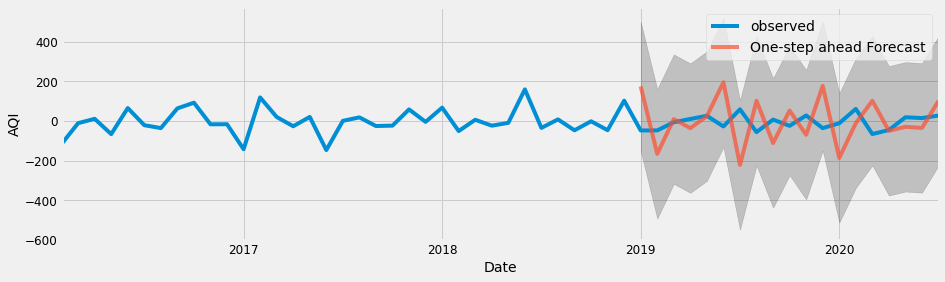

In [80]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = ts_s_adj.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('AQI')
plt.legend()
plt.show()

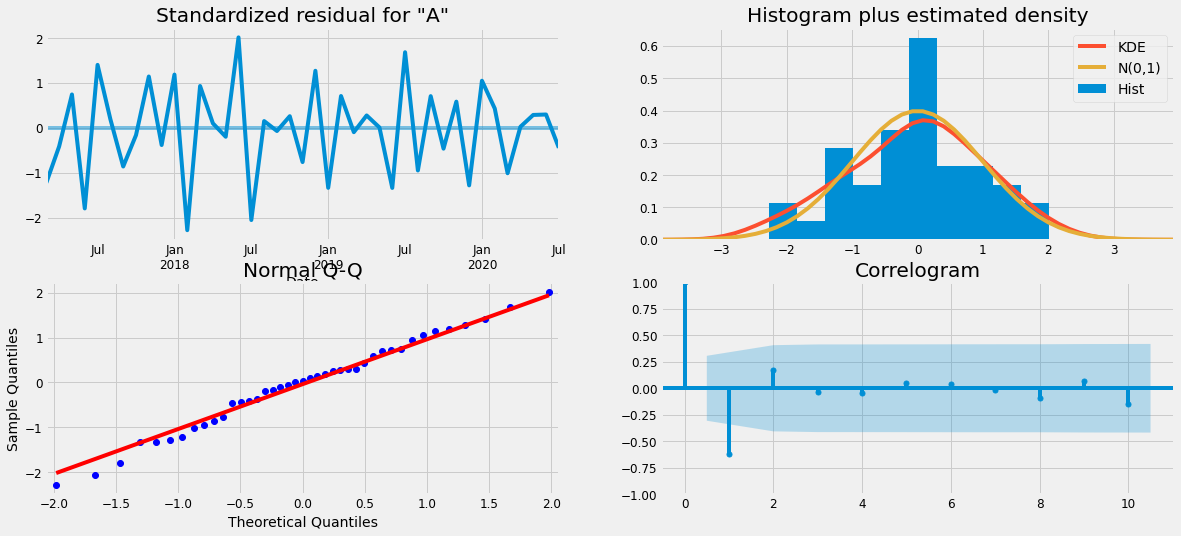

In [81]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

In [59]:
df2 = pd.DataFrame()

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts_month_avg,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            )
            results = mod.fit(method = 'powell')
            #print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            print('ARIMA{}x{}12'.format(param, param_seasonal))

            data = {'p': param, 'ps': param_seasonal, 'AIC':results.aic }
            df2 = df2.append(data, ignore_index=True)

        except:
            continue

0
ARIMA(0, 1, 2)x(0, 1, 1, 12)12
Optimization terminated successfully.
         Current function value: 4.176970
         Iterations: 5
         Function evaluations: 301
ARIMA(0, 1, 2)x(0, 1, 2, 12)12
Optimization terminated successfully.
         Current function value: 4.172021
         Iterations: 5
         Function evaluations: 374
ARIMA(0, 1, 2)x(0, 1, 3, 12)12
Optimization terminated successfully.
         Current function value: 4.193541
         Iterations: 6
         Function evaluations: 294
ARIMA(0, 1, 2)x(1, 1, 0, 12)12
Optimization terminated successfully.
         Current function value: 4.173882
         Iterations: 5
         Function evaluations: 309
ARIMA(0, 1, 2)x(1, 1, 1, 12)12
Optimization terminated successfully.
         Current function value: 4.173923
         Iterations: 5
         Function evaluations: 360
ARIMA(0, 1, 2)x(1, 1, 2, 12)12
Optimization terminated successfully.
         Current function value: 4.174117
         Iterations: 6
         Function e

In [61]:
df2.sort_values(by="AIC",ascending=False)

,AIC,p,ps
0,591.870762,"(0, 1, 0)","(0, 1, 0, 12)"
96,590.078276,"(2, 1, 0)","(0, 1, 0, 12)"
48,589.417883,"(1, 1, 0)","(0, 1, 0, 12)"
84,587.908031,"(1, 1, 3)","(0, 1, 0, 12)"
120,587.715571,"(2, 1, 2)","(0, 1, 0, 12)"
...,...,...,...
113,568.081259,"(2, 1, 1)","(1, 1, 1, 12)"
65,567.952703,"(1, 1, 1)","(1, 1, 1, 12)"
141,567.796269,"(2, 1, 3)","(2, 1, 1, 12)"
116,567.653486,"(2, 1, 1)","(2, 1, 0, 12)"


In [75]:
mod = sm.tsa.statespace.SARIMAX(ts_month_avg,
                                order=(0, 1, 0),
                                seasonal_order=(0, 1, 0, 12))
results = mod.fit(method = 'powell')
print(results.summary().tables[1])

Optimization terminated successfully.
         Current function value: 4.402021
         Iterations: 2
         Function evaluations: 37
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3247.5482    514.270      6.315      0.000    2239.598    4255.498


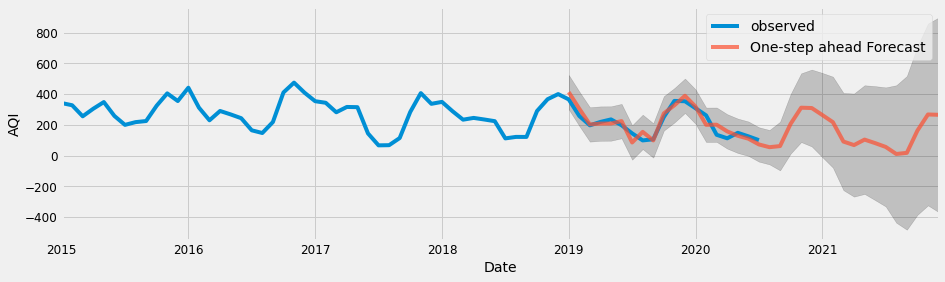

In [76]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-01'), end=pd.to_datetime('2021-12-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = ts_month_avg.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('AQI')
plt.legend()
plt.show()

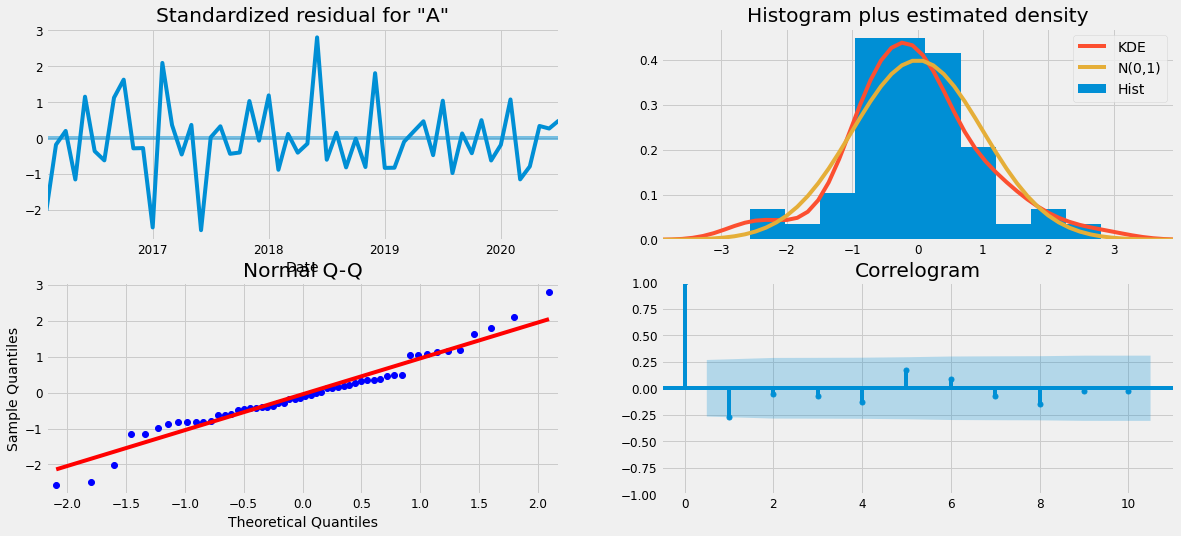

In [77]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()